# Data Overview and Recommendation
The provided DataFrame contains information about individuals' health attributes, including age, gender, hypertension, heart disease, BMI, smoking status, and whether they've had a stroke.

The analysis of the dataset reveals that the distribution of the target variable, "stroke," is imbalanced. This imbalance can lead to biased models that perform poorly, especially on the minority class (individuals who have had a stroke).

Considering the imbalanced nature of the target variable and the critical importance of correctly identifying individuals at risk of stroke, it is recommended to employ resampling techniques such as Synthetic Minority Over-sampling Technique (SMOTE).

Without addressing the imbalance issue, machine learning models trained on this dataset may exhibit low precision, especially in predicting individuals who have had a stroke. By using SMOTE to balance the dataset, we can enhance the model's ability to correctly classify individuals at risk of stroke, ultimately improving the overall predictive performance.

<img src="https://www.healthywomen.org/media-library/stroke-vs-heart-attack-know-the-signs-symptoms.png?id=32931472&width=1200&height=800&quality=85&coordinates=0%2C0%2C0%2C1" width=1000 height=400>

## Data Dictionary

| Column | Description |
| --- | --- |
| Age | Age of the Person|
| Sex | Sex of the Person|
| BMI | Body Mass Index|
| Children | Number of Children |
| Smoker | Smoker or Non-smoker | 
| Region | Region |
| Charges | Insurance Price|




In [20]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Some Numerical Information about the Data

In [22]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [23]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [25]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Visualization 

### Stroke Distribution


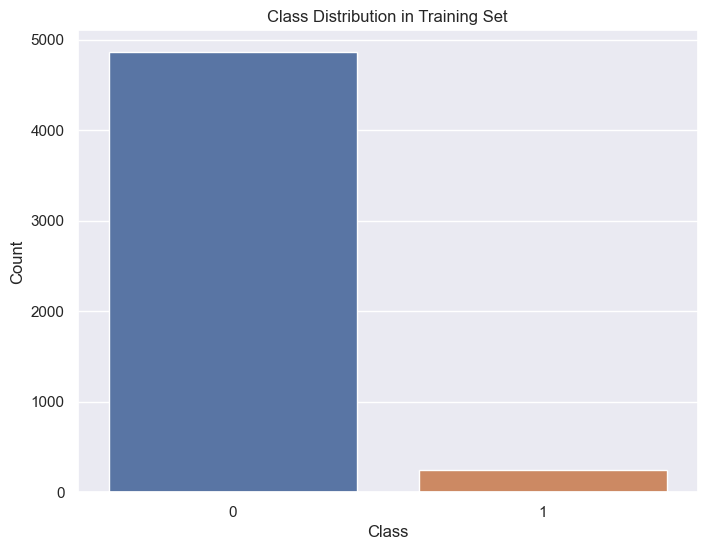

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['stroke'])
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Because of the imbalance in the distribution, resampling techniques have been applied to balance the dataset.


In [27]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y)
X = df.drop(columns=['stroke'])  # Remove the stroke column from features
y = df['stroke']  # Target variable

# Apply resampling techniques
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X, y)

# Concatenate resampled X and y back into a dataframe
df_resampled = pd.concat([X_over_resampled, y_over_resampled], axis=1)


In [28]:
df_resampled.shape

(9722, 12)

In [29]:
continuous = ['age', 'bmi', 'avg_glucose_level']

## Continuous Feature Distribution

This function visualizes the distribution of continuous features using a boxplot and a histogram with kernel density estimation (KDE).


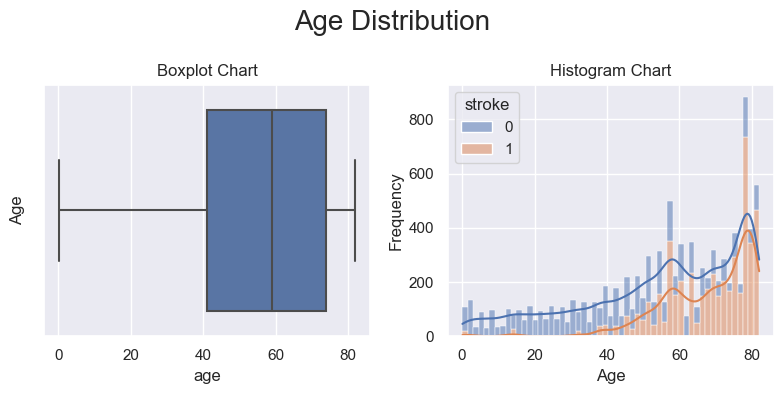

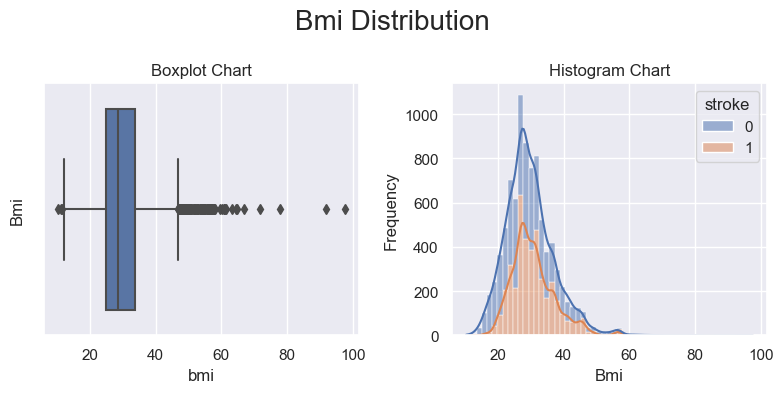

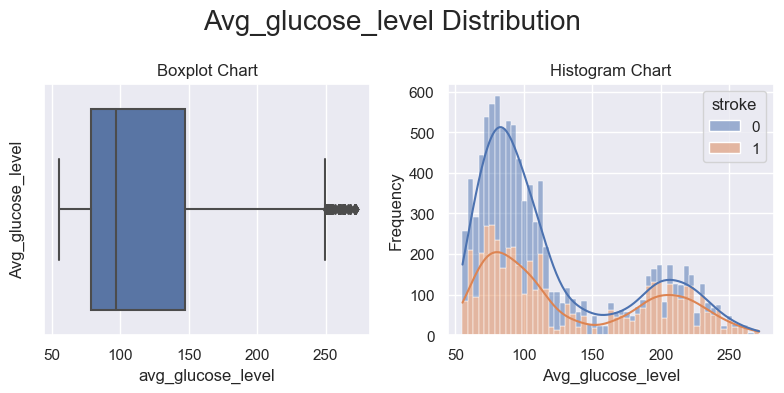

In [30]:
import seaborn as sns

def plot_continuous_distribution(df, column, hue, figsize=(8, 4)):
    fig, ax = plt.subplots(1, 2, figsize=figsize) 
    fig.suptitle(f'{column.capitalize()} Distribution', fontsize=20)
    
    sns.boxplot(data=df, x=column, ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(column.capitalize())

    sns.histplot(data=df, x=column, kde=True, ax=ax[1], hue=hue, multiple='stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(column.capitalize())

    plt.tight_layout()    
    plt.show()

# Example usage
continuous = ['age', 'bmi', 'avg_glucose_level']
for conti in continuous:
    plot_continuous_distribution(df_resampled, conti, 'stroke')
 

In [31]:
categorical = ['stroke', 'gender', 'Residence_type', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status', 'work_type']

## Distribution of Categorical Features

This markdown illustrates the distribution of categorical features using pie charts, depicting percentages for each category. Custom colors enhance visibility and spacing ensures clarity.


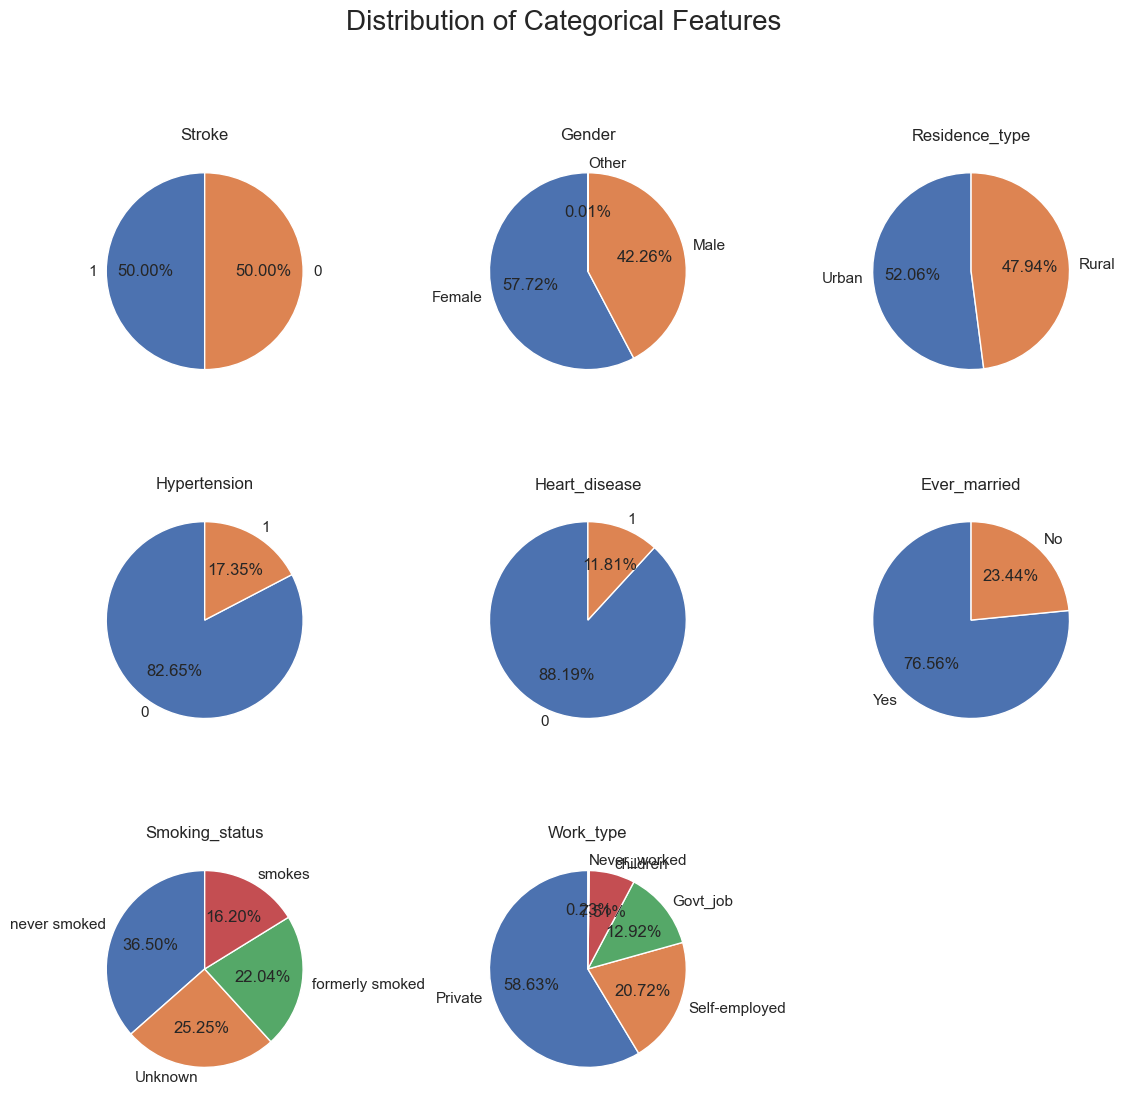

In [32]:
import seaborn as sns



# distribution of categorical features
categorical = ['stroke', 'gender', 'Residence_type', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status', 'work_type']

# Calculate the number of rows and columns for the grid layout
num_rows = (len(categorical) + 2) // 3  # Round up to the nearest integer
num_cols = 3

# Create a grid of subplots using Seaborn
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
fig.suptitle('Distribution of Categorical Features', fontsize=20)

# Flatten the axes if needed
axes = axes.flatten()

# Plot each categorical feature as a pie chart using Matplotlib
for i, cat in enumerate(categorical):
    values = df_resampled[cat].value_counts()
    axes[i].pie(values, labels=values.index, autopct="%.2f%%", startangle=90)
    axes[i].set_title(cat.capitalize())
    axes[i].set_aspect('equal')  # Ensure pie chart is circular

# Adjust layout and spacing to prevent overlapping labels
plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=1.0)

# Remove any extra empty subplots
for j in range(len(categorical), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.show()


The bar plots above depict the count of strokes for different categorical variables. Each subplot represents a pair of categorical variables, with the bars indicating the count of strokes ('Yes' and 'No'). This visualization helps understand the relationship between each categorical variable and the occurrence of strokes.


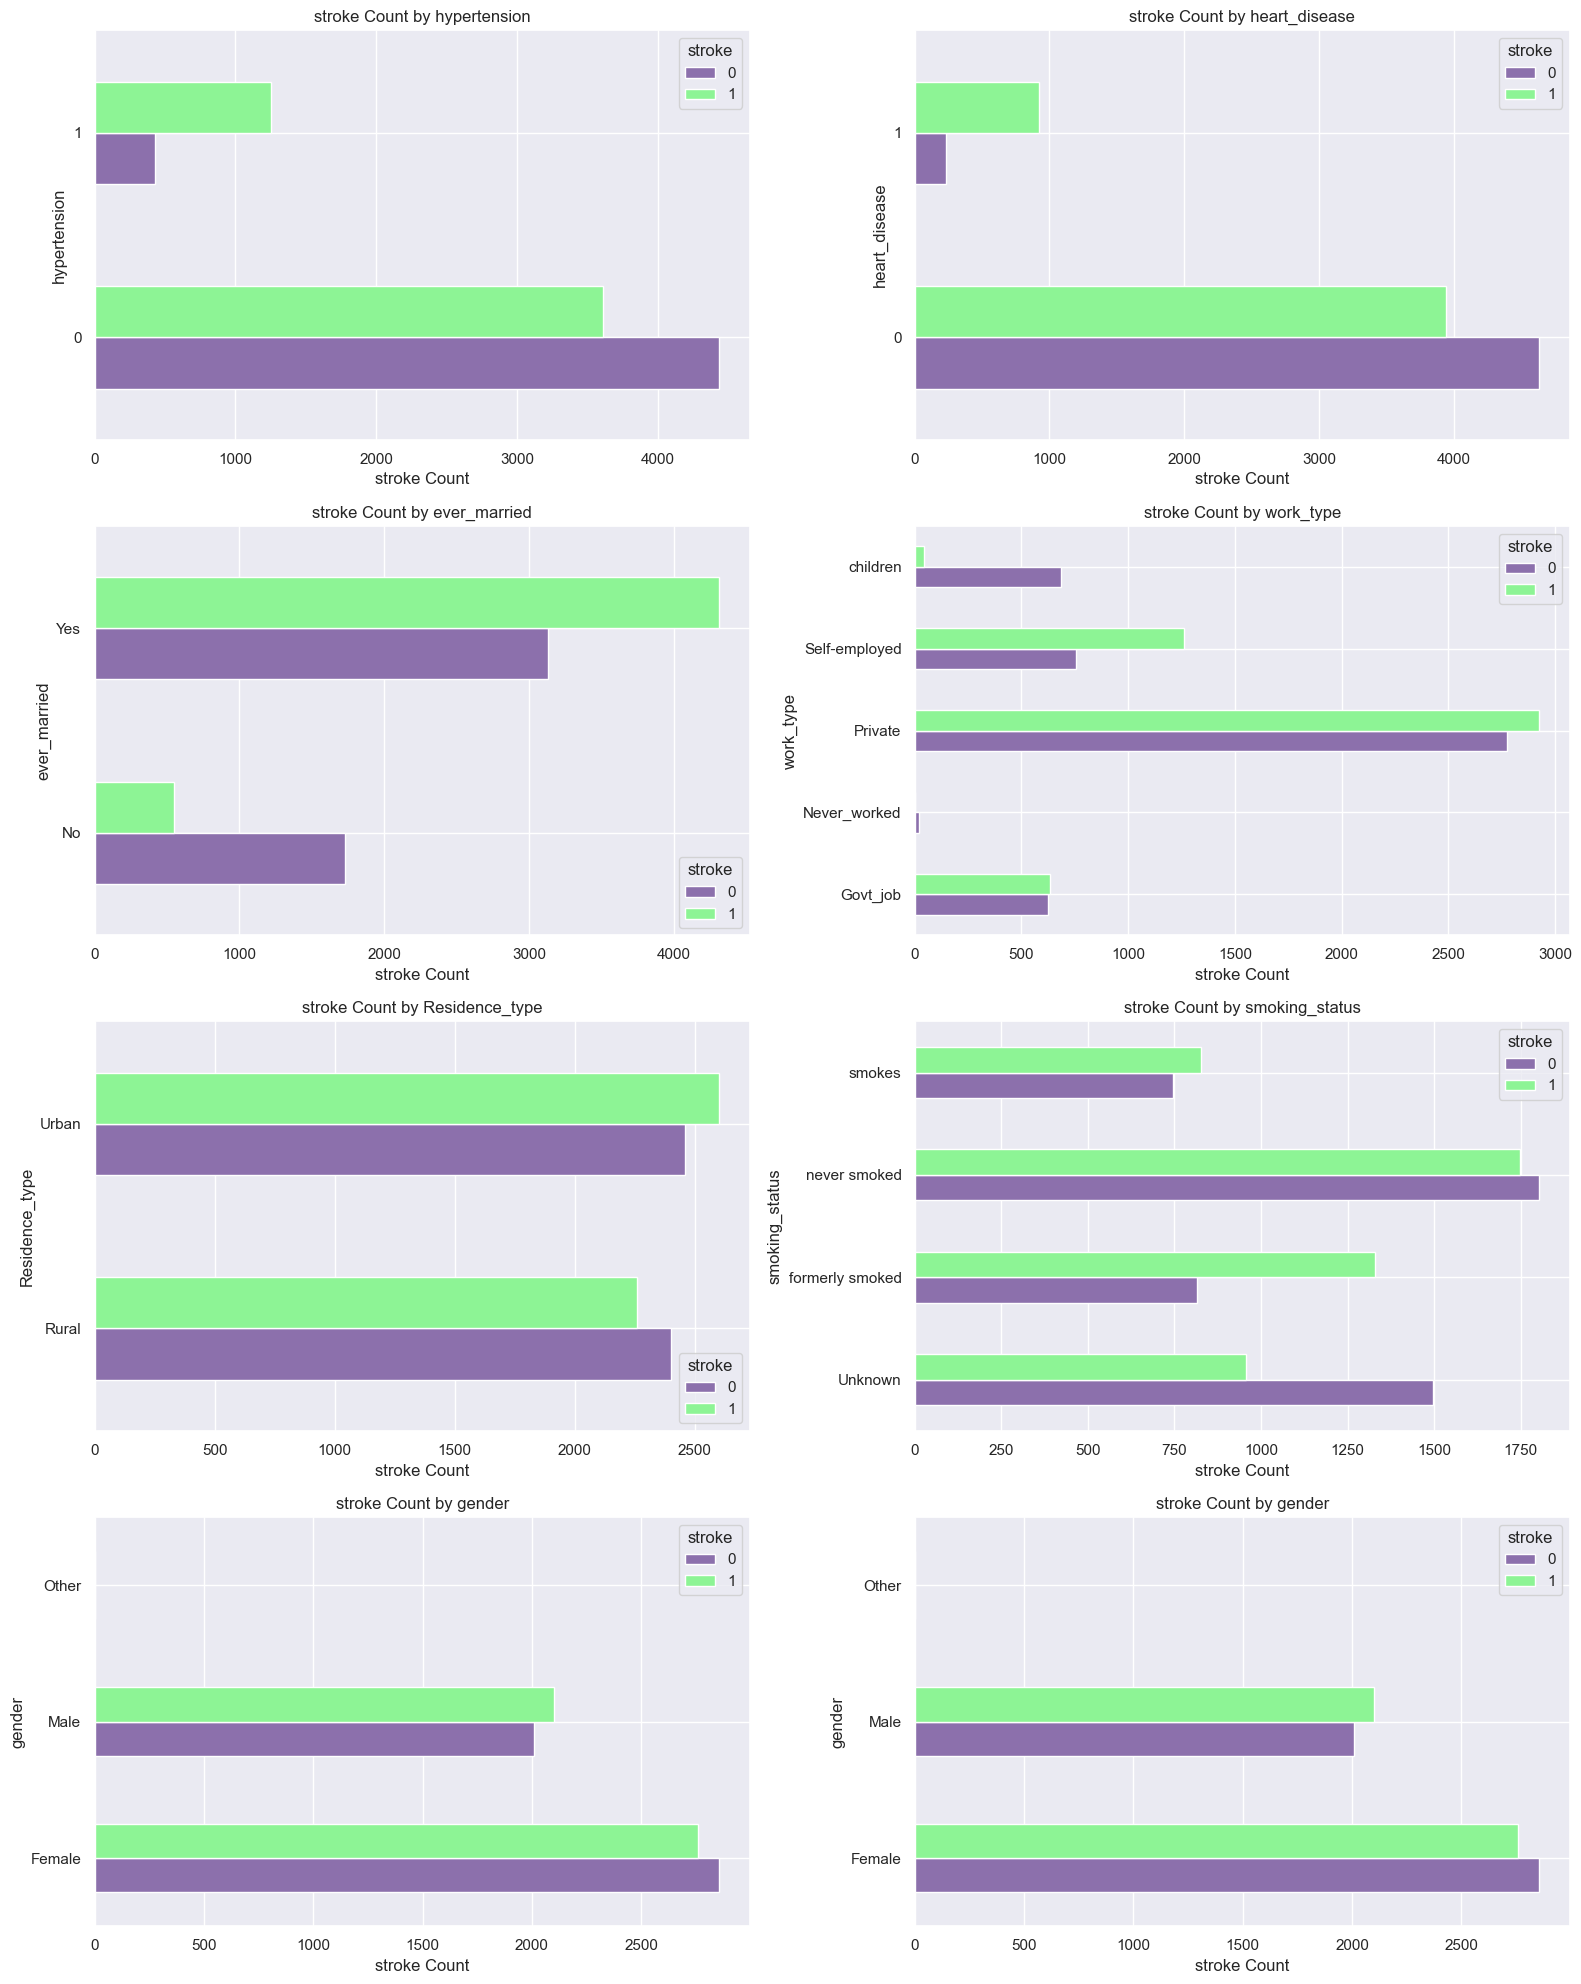

In [33]:
def bar_plot(x, y, df, ax):
    barh = df.groupby([x, y]).size().unstack()
    barh.plot(kind='barh', color=['#8c70ac', '#8df495'], ax=ax)
    ax.set_title(f'{y} Count by {x}')
    ax.set_xlabel(f'{y} Count')
    ax.set_ylabel(x)

# Create subplots grid
fig, axs = plt.subplots(4, 2, figsize=(16, 20))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Call bar_plot for each pair of x and y
pairs = [('hypertension', 'stroke'), ('heart_disease', 'stroke'), ('ever_married', 'stroke'),
         ('work_type', 'stroke'), ('Residence_type', 'stroke'), ('smoking_status', 'stroke'),
         ('gender', 'stroke'), ('gender', 'stroke')]

for i, pair in enumerate(pairs):
    bar_plot(pair[0], pair[1], df_resampled, axs[i])

plt.tight_layout()
plt.show()


The box plots above illustrate the distribution of BMI values across different categories of work type and smoking status, with respect to the occurrence of strokes. Each subplot compares the BMI distribution within categories, differentiated by stroke status. These visualizations provide insights into the relationship between BMI, work type, smoking status, and the likelihood of expe


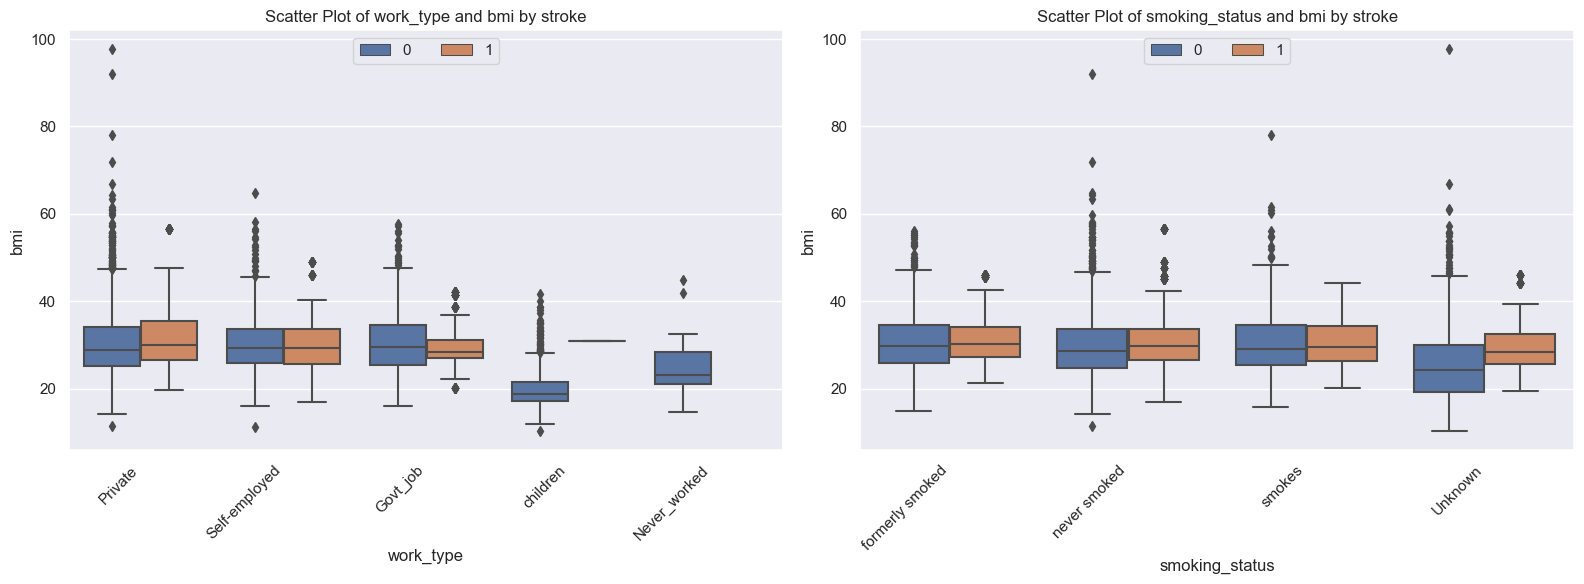

In [34]:
def box_plot(data, x, y, hue, ax):
    sns.boxplot(data=data, x=x, y=y, hue=hue, ax=ax)
    ax.set_title(f'Scatter Plot of {x} and {y} by {hue}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend(title=None, ncol=2, loc='upper center')

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Call the box_plot function for each pair of variables
box_plot(data=df_resampled, x="work_type", y="bmi", hue="stroke", ax=axs[0])
box_plot(data=df_resampled, x="smoking_status", y="bmi", hue="stroke", ax=axs[1])

plt.tight_layout()
plt.show()


The scatter plots above depict the relationship between BMI and age, as well as BMI and work type, with strokes differentiated by color. These visualizations provide insights into potential correlations between BMI, age, work type, and the likelihood of experiencing a stroke.


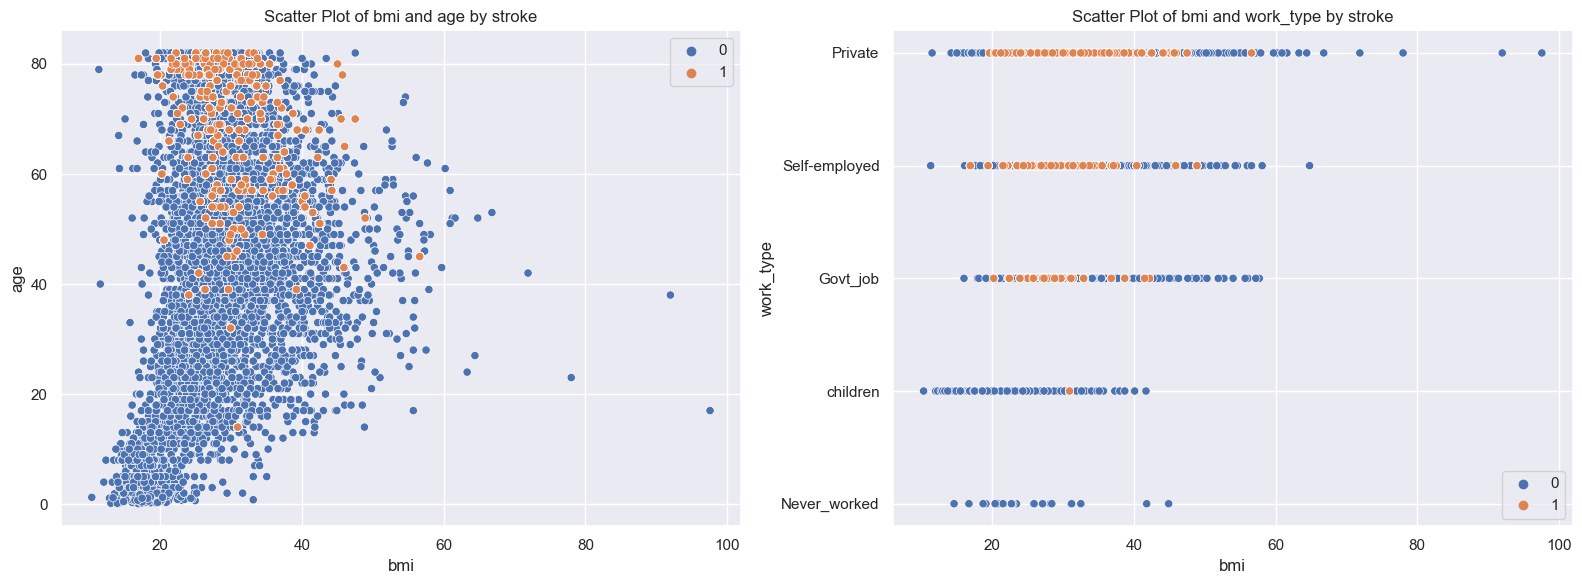

In [35]:
def scatter_plot(data, x, y, hue, ax):
    sns.scatterplot(data=data, x=x, y=y, hue=hue, ax=ax)
    ax.set_title(f'Scatter Plot of {x} and {y} by {hue}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend(title=None)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Call the scatter_plot function for each pair of variables
scatter_plot(data=df_resampled, x="bmi", y="age", hue="stroke", ax=axs[0])
scatter_plot(data=df_resampled, x="bmi", y="work_type", hue="stroke", ax=axs[1])

plt.tight_layout()
plt.show()


# Data Preprocessing

In [36]:
df.drop(columns='id',inplace=True)

The missing values in the 'bmi' column have been replaced using a weighted random choice based on the distribution of the most frequent values. After replacement, the new value counts for the 'bmi' column are as follows:


In [37]:
# Create a Dictionary of the Most Frequent Values of BMI
bmi_dic = dict(df['bmi'].value_counts().head(2))
bmi_dic = {key: value / sum(bmi_dic.values()) for key, value in bmi_dic.items()}

# Define a Function for Replace Missing Values with np.random.choice
def replace_null(dic):
    items = list(dic.keys())
    weights = list(dic.values())
    
    return np.random.choice(items, p=weights)

# Apply replace_null Function on Column
df['bmi'] = df['bmi'].apply(lambda x: replace_null(bmi_dic) if pd.isnull(x) else x) 

# Check the value counts after replacing missing values
print(df['bmi'].value_counts())

bmi
28.4    144
28.7    136
26.1     37
27.6     37
26.7     37
       ... 
11.5      1
40.6      1
53.9      1
97.6      1
14.9      1
Name: count, Length: 418, dtype: int64


In [38]:
# Perform one-hot encoding for each categorical column and concatenate with the original DataFrame
df = pd.get_dummies(df, columns=['Residence_type', 'work_type', 'gender', 'ever_married', 'smoking_status'])

# Drop the original categorical columns
df.drop(columns=['Residence_type', 'work_type', 'gender', 'ever_married', 'smoking_status'], inplace=True, errors='ignore')

print(df)


       age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0             0              1             228.69  36.6       1   
1     61.0             0              0             202.21  28.4       1   
2     80.0             0              1             105.92  32.5       1   
3     49.0             0              0             171.23  34.4       1   
4     79.0             1              0             174.12  24.0       1   
...    ...           ...            ...                ...   ...     ...   
5105  80.0             1              0              83.75  28.7       0   
5106  81.0             0              0             125.20  40.0       0   
5107  35.0             0              0              82.99  30.6       0   
5108  51.0             0              0             166.29  25.6       0   
5109  44.0             0              0              85.28  26.2       0   

      Residence_type_Rural  Residence_type_Urban  work_type_Govt_job  \
0              

# Training and Evaluating Different Models

To address the imbalance in the target variable 'stroke', both over-sampling and under-sampling techniques are applied using the SMOTE (Synthetic Minority Over-sampling Technique), RandomOverSampler, and RandomUnderSampler methods from the imbalanced-learn library. The following steps are taken:
1. SMOTE is used to perform over-sampling, creating synthetic samples for the minority class to balance the dataset.
2. RandomOverSampler is applied with a sampling strategy set to 'minority' to over-sample the minority class.
3. RandomUnderSampler is utilized with a sampling strategy set to 'majority' to under-sample the majority class.


In [39]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
smote = SMOTE()
X = df.drop(columns=['stroke'])  # Remove the stroke column from features
y = df['stroke']  # Target variable
X_resampled, y_resampled = smote.fit_resample(X, y)
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X, y)
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)

In [40]:
print(X_resampled.shape,y_resampled.shape)
print(X_over_resampled.shape,y_over_resampled.shape)
print(X_under_resampled.shape,y_under_resampled.shape)

(9722, 21) (9722,)
(9722, 21) (9722,)
(498, 21) (498,)


The RandomForestClassifier model is trained and evaluated on the balanced dataset obtained after under-sampling. Here's a summary of the classification report and the confusion matrix plot:


              precision    recall  f1-score   support

           0       0.76      0.69      0.72        78
           1       0.70      0.76      0.73        72

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.73      0.73      0.73       150



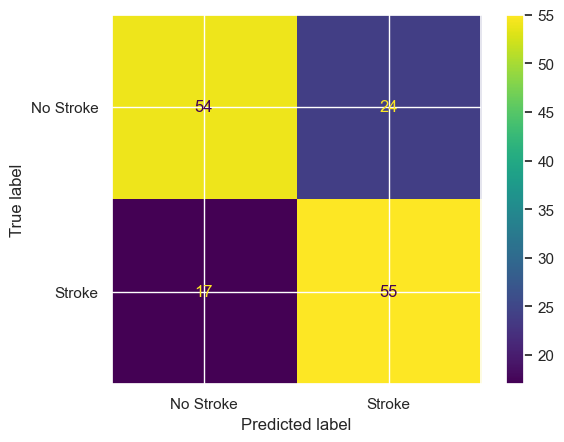

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Assuming X_under_resampled and y_under_resampled are defined somewhere

X_train, X_test, y_train, y_test = train_test_split(X_under_resampled, y_under_resampled, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['No Stroke', 'Stroke']).plot()


The RandomForestClassifier model is trained and evaluated on the balanced dataset obtained after over-sampling. Here's a summary of the classification report and the confusion matrix plot:


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.99      0.95      0.97      1460

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



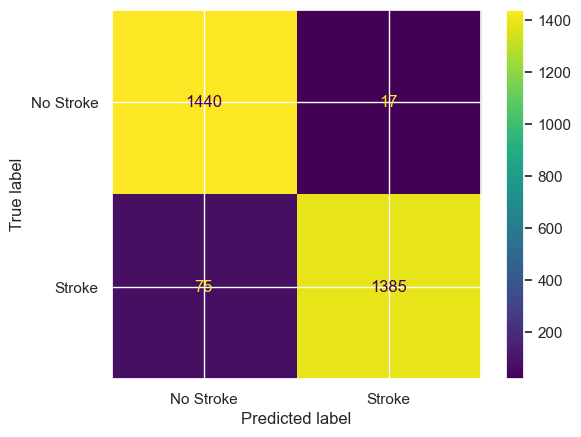

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

The RandomForestClassifier model is trained and evaluated on the balanced dataset obtained after over-sampling. Here's a summary of the classification report and the confusion matrix plot:


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1457
           1       0.98      1.00      0.99      1460

    accuracy                           0.99      2917
   macro avg       0.99      0.99      0.99      2917
weighted avg       0.99      0.99      0.99      2917



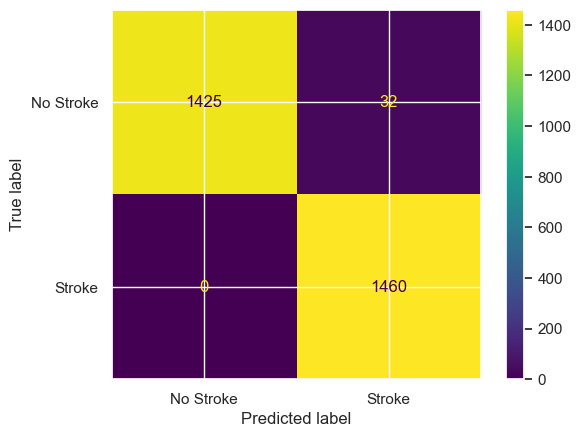

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X_over_resampled,y_over_resampled,test_size=0.3,random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

# conclusion
the Random Forest Classifier trained on the over-sampled dataset using the SMOTE technique has demonstrated remarkable performance in predicting strokes. With nearly perfect precision (close to 1), the model exhibits high accuracy in identifying both positive and negative cases of stroke. This underscores the effectiveness of employing over-sampling methods like SMOTE to address class imbalance, enabling the classifier to learn from a more balanced representation of the target classes and thereby improving its predictive capabilities.
For any questions or feedback, please feel free to reach out to the project maintainer at [ mahditajdari09@gmail.com , huseinmohammadi83@gmail.com]


*Mahdi Tajdari*  
*Hossein Mohamadi*
